In [4]:
import pandas as pd 
import glob
from datetime import date
from wetterdienst import Wetterdienst
import geopandas as gpd

import requests
import json
import numpy as np

In [67]:
dfgeo = gpd.read_file('https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.geojson')

In [69]:
dfgeo = dfgeo.loc[dfgeo['Landkreis'] == 'SK Nürnberg']

In [71]:
dfgeo = dfgeo.groupby(['Refdatum']).sum()

In [74]:
dfgeo = dfgeo.reset_index()


In [76]:
df1 = pd.DataFrame(dfgeo)

In [90]:
df1['Summe7Tage'] = df1.AnzahlFall.rolling(min_periods=1, window=7).sum()

In [97]:
df1['7TIW'] = (df1.Summe7Tage/518365)*100000

<AxesSubplot:xlabel='Refdatum'>

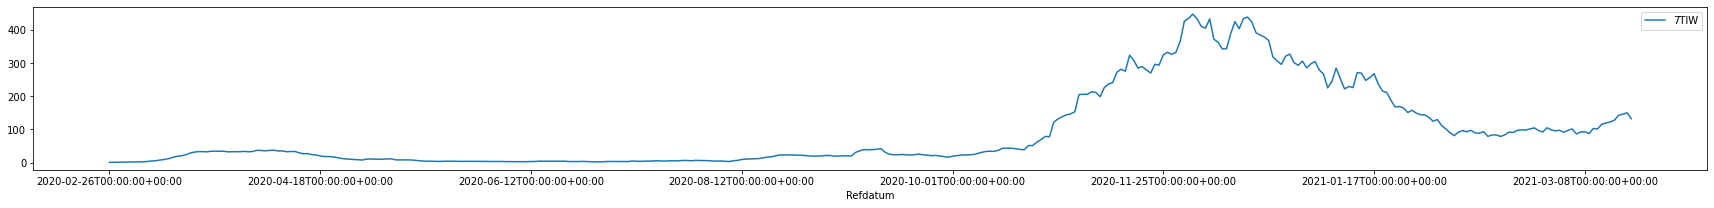

In [100]:
df1.plot(x='Refdatum',y='7TIW',figsize=(30,3))

In [103]:
df1 = df1[['Refdatum','7TIW']]

In [104]:
df1

,Refdatum,7TIW
0,2020-02-26T00:00:00+00:00,0.385829
1,2020-02-27T00:00:00+00:00,0.771657
2,2020-02-29T00:00:00+00:00,0.964571
3,2020-03-01T00:00:00+00:00,1.157486
4,2020-03-02T00:00:00+00:00,1.543314
...,...,...
357,2021-03-15T00:00:00+00:00,127.709240
358,2021-03-16T00:00:00+00:00,142.370723
359,2021-03-17T00:00:00+00:00,145.843180
360,2021-03-18T00:00:00+00:00,149.894379


In [19]:
df1.columns = ['7TIW']

NameError: name 'df1' is not defined

# Wetterdaten holen

In [5]:
today = date.today()
print("Today's date:", today)

Today's date: 2021-03-20


In [6]:
API = Wetterdienst("dwd", "observation")

request = API(
    parameter=["climate_summary"],
    resolution="daily",
    start_date="2020-04-02",  # Timezone: UTC
    end_date=today,  # Timezone: UTC
    tidy_data=True,  # default
    humanize_parameters=True,  # default
 ).filter(station_id=[3668]) #Wetter für Nbg

start_date and end_date filtering limited to defined periods [<Period.HISTORICAL: 'historical'>, <Period.RECENT: 'recent'>, <Period.NOW: 'now'>]
The combination of kl, daily, now is invalid.


In [7]:
stations = request.df

In [8]:
values = request.values.all().df

100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


In [110]:
values.head()

,DATE,STATION_ID,PARAMETER_SET,PARAMETER,VALUE,QUALITY
0,2020-04-02 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,7.7,10
1,2020-04-03 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,8.2,10
2,2020-04-04 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,7.2,10
3,2020-04-05 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,13.0,10
4,2020-04-06 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,5.7,10


In [111]:
values.PARAMETER.value_counts()

WIND_SPEED                 353
WIND_GUST_MAX              353
CLOUD_COVER_TOTAL          353
PRESSURE_AIR               353
PRECIPITATION_HEIGHT       353
PRECIPITATION_FORM         353
SUNSHINE_DURATION          353
SNOW_DEPTH                 353
TEMPERATURE_AIR_MIN_005    353
TEMPERATURE_AIR_200        353
TEMPERATURE_AIR_MIN_200    353
TEMPERATURE_AIR_MAX_200    353
HUMIDITY                   353
PRESSURE_VAPOR             353
Name: PARAMETER, dtype: int64

In [10]:
temp = values.loc[values['PARAMETER'] == 'TEMPERATURE_AIR_200']

In [11]:
temp

,DATE,STATION_ID,PARAMETER_SET,PARAMETER,VALUE,QUALITY
3177,2020-04-02 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,4.7,3
3178,2020-04-03 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,5.7,3
3179,2020-04-04 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,8.0,3
3180,2020-04-05 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,10.9,3
3181,2020-04-06 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,10.9,3
...,...,...,...,...,...,...
3525,2021-03-16 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,3.3,1
3526,2021-03-17 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,1.5,1
3527,2021-03-18 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,1.5,1
3528,2021-03-19 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,1.2,1


<AxesSubplot:xlabel='DATE'>

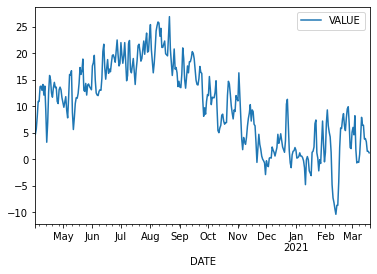

In [12]:
temp.plot(x='DATE',y='VALUE')

In [16]:
sun = values.loc[values['PARAMETER'] == 'SUNSHINE_DURATION']

In [17]:
sun

,DATE,STATION_ID,PARAMETER_SET,PARAMETER,VALUE,QUALITY
1412,2020-04-02 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.433,3
1413,2020-04-03 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,2.067,3
1414,2020-04-04 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.050,3
1415,2020-04-05 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.667,3
1416,2020-04-06 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.700,3
...,...,...,...,...,...,...
1760,2021-03-16 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,1.750,1
1761,2021-03-17 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,1.700,1
1762,2021-03-18 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,3.783,1
1763,2021-03-19 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,3.217,1


<AxesSubplot:xlabel='DATE'>

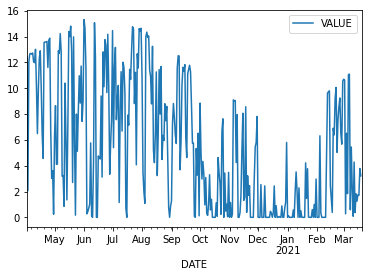

In [18]:
sun.plot(x='DATE',y='VALUE')

In [118]:
values['temp'] = temp.VALUE

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
values

,DATE,STATION_ID,PARAMETER_SET,PARAMETER,VALUE,QUALITY,temp
1412,2020-04-02 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.433,3,NaN
1413,2020-04-03 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,2.067,3,NaN
1414,2020-04-04 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.050,3,NaN
1415,2020-04-05 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.667,3,NaN
1416,2020-04-06 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.700,3,NaN
...,...,...,...,...,...,...,...
1760,2021-03-16 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,1.750,1,NaN
1761,2021-03-17 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,1.700,1,NaN
1762,2021-03-18 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,3.783,1,NaN
1763,2021-03-19 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,3.217,1,NaN


# Kalenderdaten holen

In [26]:
holidaysdf2020datum = pd.read_json('https://feiertage-api.de/api/?jahr=2020&nur_daten',orient='index')
holidaysdf2021datum = pd.read_json('https://feiertage-api.de/api/?jahr=2021&nur_daten',orient='index')

In [27]:
holidaysdf2020datum.columns = ['RefDay']
holidaysdf2021datum.columns = ['RefDay']

In [28]:
holydaysComp = pd.concat([holidaysdf2020datum,holidaysdf2021datum]).fillna(0)

In [25]:
holydaysComp.to_csv('holydays.csv')

# Corona Restriktionen holen

In [20]:
dfCoronaRestr = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
dfCoronaRestr = dfCoronaRestr[dfCoronaRestr.CountryName == 'Germany']
stringency = dfCoronaRestr[['Date','StringencyIndexForDisplay']]

In [25]:
stringency

,Date,StringencyIndexForDisplay
37380,20200101,0.00
37381,20200102,0.00
37382,20200103,0.00
37383,20200104,0.00
37384,20200105,0.00
...,...,...
37820,20210316,77.78
37821,20210317,77.78
37822,20210318,77.78
37823,20210319,77.78


In [24]:
stringency.set_index('Date')

,StringencyIndexForDisplay
Date,
20200101,0.00
20200102,0.00
20200103,0.00
20200104,0.00
20200105,0.00
...,...
20210316,77.78
20210317,77.78
20210318,77.78
